# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [749]:
import pandas as pd

In [750]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [751]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [752]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [753]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [754]:
Y = data['affair']

In [755]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [756]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [757]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [758]:
predictions = model.predict_proba(X_test)

In [759]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [760]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [761]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [762]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [763]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [764]:
precision = tp / (tp + fp)
precision

0.5681233933161953

### Используем готовые библиотеки

In [765]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [766]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [767]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.307813319349764, 1.0, 0.04895298489027318)
(0.3074501573976915, 0.9982964224872232, 0.052098191068080245)
(0.30761154855643047, 0.9982964224872232, 0.052539545559255)
(0.3077731092436975, 0.9982964224872232, 0.05290951862937126)
(0.30793483972674723, 0.9982964224872232, 0.05372856464959367)
(0.30809674027339645, 0.9982964224872232, 0.05418294149815478)
(0.30825881115202525, 0.9982964224872232, 0.05456382058361409)
(0.30842105263157893, 0.9982964224872232, 0.054741310936288305)
(0.30858346498156924, 0.9982964224872232, 0.055453397823264576)
(0.3087460484720759, 0.9982964224872232, 0.057801337612338674)
(0.30890880337374804, 0.9982964224872232, 0.059328241773613795)
(0.3090717299578059, 0.9982964224872232, 0.05936553926787768)
(0.3092348284960422, 0.9982964224872232, 0.06182230445338815)
(0.3093980992608237, 0.9982964224872232, 0.06210531052131707)
(0.30956154252509244, 0.9982964224872232, 0.062440172645206536)
(0.3091966173361522, 0.9965928449744463, 0.06245992722965583)
(0.309360126

In [768]:
from sklearn.metrics import average_precision_score

In [769]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

### ROC

In [770]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [947]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [832]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9445589136029695)
(0.0, 0.0017035775127768314, 0.9445589136029696)
(0.0, 0.017035775127768313, 0.8789939377792317)
(0.0007558578987150416, 0.017035775127768313, 0.8786478779112944)
(0.0007558578987150416, 0.028960817717206135, 0.8743556662464672)
(0.0022675736961451248, 0.028960817717206135, 0.8701673271799358)
(0.0022675736961451248, 0.034071550255536626, 0.866820140264318)
(0.003779289493575208, 0.034071550255536626, 0.8579621220526474)
(0.003779289493575208, 0.03577512776831346, 0.8557638745365836)
(0.0045351473922902496, 0.03577512776831346, 0.8523294480917275)
(0.0045351473922902496, 0.03747870528109029, 0.8505415403317492)
(0.006046863189720333, 0.03747870528109029, 0.8373703328383985)
(0.006046863189720333, 0.049403747870528106, 0.8283556865417957)
(0.006802721088435374, 0.049403747870528106, 0.8272570832978605)
(0.006802721088435374, 0.05281090289608177, 0.8244237816629214)
(0.007558578987150416, 0.05281090289608177, 0.8228902848542047)
(0.007558578987150416, 0.054

In [786]:
import matplotlib.pyplot as plt

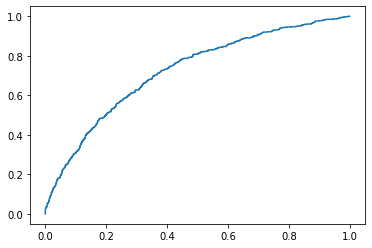

In [948]:
plt.plot( fpr, tpr )

## ДЗ

In [1000]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )

fpr_dz = []
tpr_dz = []
porog = []

i = 0 

porog.append(0)
fpr_dz.append(1) 
tpr_dz.append(1)
    
for i, t in sorted(zip( predictions[:, 1], Y_test )):   
    i += 0.0001
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ): 
        
        if predicted_prob >= i:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    porog.append(i)
    fpr_dz.append(fp / (tn + fp)) 
    tpr_dz.append(tp / (fn + tp))
      
porog.append(1)
fpr_dz.append(0) 
tpr_dz.append(0)

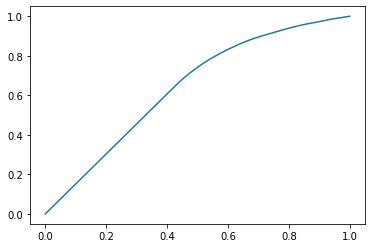

In [1001]:
plt.plot( fpr_dz, tpr_dz )

In [1002]:
for line in zip( fpr_dz, tpr_dz, porog):
    print( line )

(1, 1, 0)
(0.999244142101285, 1.0, 0.03265386653613952)
(0.9988662131519275, 1.0, 0.04089547115863885)
(0.99848828420257, 1.0, 0.04713757671877653)
(0.9982993197278912, 0.9995741056218058, 0.04905298489027318)
(0.9980347694633409, 0.9993185689948892, 0.05219819106808025)
(0.9977324263038548, 0.9991482112436116, 0.052639545559255006)
(0.9974084872044056, 0.9990265271355561, 0.05300951862937126)
(0.9970710506424793, 0.9989352640545145, 0.05382856464959367)
(0.9967246157722348, 0.9988642816581488, 0.05428294149815478)
(0.9963718820861678, 0.9988074957410562, 0.05466382058361409)
(0.9960145674431389, 0.9987610345361623, 0.05484131093628831)
(0.9956538170823885, 0.9987223168654173, 0.05555339782326458)
(0.9952904238618524, 0.9986895557594024, 0.05790133761233868)
(0.9948709642587193, 0.9986614748113897, 0.0594282417736138)
(0.9945074326026707, 0.9986371379897785, 0.05946553926787768)
(0.9941421012849584, 0.9986158432708688, 0.06192230445338815)
(0.9937752878929349, 0.9985970538130073, 0.062

In [997]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )

fpr_dz = []
tpr_dz = []
porog = []

i = 0 

porog.append(0)
fpr_dz.append(1) 
tpr_dz.append(1)
    
while i <= 1:  
    i += 0.00005
    for predicted_prob, actual in sorted( zip( predictions[:, 1], Y_test )): 
        
        if predicted_prob >= i:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    porog.append(i)
    fpr_dz.append(fp / (tn + fp)) 
    tpr_dz.append(tp / (fn + tp))
      
porog.append(1)
fpr_dz.append(0) 
tpr_dz.append(0)

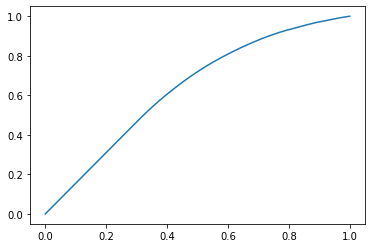

In [998]:
plt.plot( fpr_dz, tpr_dz )

In [999]:
for line in zip( fpr_dz, tpr_dz, porog):
    print( line )

(1, 1, 0)
(1.0, 1.0, 5e-05)
(1.0, 1.0, 0.0001)
(1.0, 1.0, 0.00015000000000000001)
(1.0, 1.0, 0.0002)
(1.0, 1.0, 0.00025)
(1.0, 1.0, 0.00030000000000000003)
(1.0, 1.0, 0.00035000000000000005)
(1.0, 1.0, 0.0004000000000000001)
(1.0, 1.0, 0.0004500000000000001)
(1.0, 1.0, 0.0005000000000000001)
(1.0, 1.0, 0.0005500000000000001)
(1.0, 1.0, 0.0006000000000000002)
(1.0, 1.0, 0.0006500000000000002)
(1.0, 1.0, 0.0007000000000000002)
(1.0, 1.0, 0.0007500000000000002)
(1.0, 1.0, 0.0008000000000000003)
(1.0, 1.0, 0.0008500000000000003)
(1.0, 1.0, 0.0009000000000000003)
(1.0, 1.0, 0.0009500000000000003)
(1.0, 1.0, 0.0010000000000000002)
(1.0, 1.0, 0.0010500000000000002)
(1.0, 1.0, 0.0011)
(1.0, 1.0, 0.00115)
(1.0, 1.0, 0.0012)
(1.0, 1.0, 0.0012499999999999998)
(1.0, 1.0, 0.0012999999999999997)
(1.0, 1.0, 0.0013499999999999996)
(1.0, 1.0, 0.0013999999999999996)
(1.0, 1.0, 0.0014499999999999995)
(1.0, 1.0, 0.0014999999999999994)
(1.0, 1.0, 0.0015499999999999993)
(1.0, 1.0, 0.0015999999999999992)
(1.

(0.9740304681989069, 0.9938065698001889, 0.11084999999999595)
(0.9739920815535913, 0.9937986091802704, 0.11089999999999595)
(0.9739537295064238, 0.9937906557353137, 0.11094999999999594)
(0.9739154120106501, 0.9937827094556225, 0.11099999999999594)
(0.9738771290196002, 0.9937747703315188, 0.11104999999999593)
(0.9738388804866881, 0.9937668383533413, 0.11109999999999592)
(0.9738006663654115, 0.9937589135114464, 0.11114999999999592)
(0.9737624866093519, 0.993750995796208, 0.11119999999999591)
(0.9737240014607591, 0.9937430851980169, 0.11124999999999591)
(0.9736855508900176, 0.9937351817072816, 0.1112999999999959)
(0.9736471348505475, 0.9937272853144274, 0.1113499999999959)
(0.9736087532958525, 0.9937193960098972, 0.11139999999999589)
(0.9735704061795198, 0.9937115137841508, 0.11144999999999589)
(0.9735310766060286, 0.9937021107554564, 0.11149999999999588)
(0.9734917822898869, 0.9936927161561916, 0.11154999999999587)
(0.973452523183706, 0.9936833299750264, 0.11159999999999587)
(0.973413299

(0.8597871048060801, 0.9567846509928916, 0.21079999999998494)
(0.8597215926393744, 0.9567581368348039, 0.21084999999998494)
(0.8596561115358108, 0.9567316352486261, 0.21089999999998493)
(0.8595906614733012, 0.9567051462254189, 0.21094999999998493)
(0.8595252424297787, 0.9566786697562512, 0.21099999999998492)
(0.8594596753123845, 0.9566522058322002, 0.21104999999998492)
(0.8593941392547334, 0.956625754444352, 0.2110999999999849)
(0.8593286342347606, 0.9565993155838011, 0.2111499999999849)
(0.8592631602304222, 0.9565728892416498, 0.2111999999999849)
(0.8591977172196953, 0.9565464754090098, 0.2112499999999849)
(0.8591321263216335, 0.9565200740770005, 0.2112999999999849)
(0.8590665664578268, 0.9564936852367497, 0.21134999999998488)
(0.8590010376062546, 0.9564673088793941, 0.21139999999998488)
(0.8589355397449172, 0.9564409449960785, 0.21144999999998487)
(0.8588700728518358, 0.9564145935779558, 0.21149999999998487)
(0.8588044582574751, 0.9563882546161877, 0.21154999999998486)
(0.85873887467

(0.7170354263665577, 0.8901734104046243, 0.3200499999999729)
(0.7169733664579026, 0.8901362808790055, 0.3200999999999729)
(0.7169113259338823, 0.8900991629509273, 0.3201499999999729)
(0.7168493047854162, 0.8900620566149564, 0.3201999999999729)
(0.7167873030034287, 0.8900249618656634, 0.3202499999999729)
(0.7167253205788507, 0.8899878786976222, 0.3202999999999729)
(0.7166633575026181, 0.8899508071054099, 0.3203499999999729)
(0.7166014137656728, 0.8899137470836072, 0.3203999999999729)
(0.716539489358962, 0.889876698626798, 0.32044999999997287)
(0.716477584273439, 0.8898396617295697, 0.32049999999997286)
(0.7164156985000625, 0.889802636386513, 0.32054999999997286)
(0.7163538320297967, 0.8897656225922222, 0.32059999999997285)
(0.7162919848536119, 0.8897286203412946, 0.32064999999997285)
(0.7162300391174728, 0.8896916296283311, 0.32069999999997284)
(0.7161681126941121, 0.889654650447936, 0.32074999999997283)
(0.7161062055744991, 0.8896176827947168, 0.32079999999997283)
(0.7160443177496095, 

(0.6150049064056542, 0.8202641737545376, 0.4107499999999629)
(0.6149540634169929, 0.8202246748356553, 0.4107999999999629)
(0.614903232803405, 0.8201851855307244, 0.4108499999999629)
(0.6148524145603727, 0.8201457058362351, 0.4108999999999629)
(0.6148016086833809, 0.8201062357486797, 0.4109499999999629)
(0.6147508151679163, 0.820066775264552, 0.4109999999999629)
(0.614700034009468, 0.8200273243803472, 0.4110499999999629)
(0.6146492652035273, 0.819987883092563, 0.4110999999999629)
(0.6145985087455875, 0.819948451397698, 0.4111499999999629)
(0.6145477646311442, 0.8199090292922531, 0.4111999999999629)
(0.6144970328556955, 0.8198696167727303, 0.41124999999996287)
(0.6144463134147411, 0.8198302138356339, 0.41129999999996286)
(0.6143956063037832, 0.8197908204774697, 0.41134999999996286)
(0.6143448196542162, 0.8197514366947449, 0.41139999999996285)
(0.6142939534950368, 0.8197120624839688, 0.41144999999996285)
(0.614243099697014, 0.8196726978416522, 0.41149999999996284)
(0.6141922582556423, 0.8

(0.5157661941324468, 0.7351044623813416, 0.5221999999999507)
(0.5157278144490071, 0.7350671930441193, 0.5222499999999507)
(0.5156894421137741, 0.7350299308425158, 0.5222999999999507)
(0.5156510771246375, 0.734992675774482, 0.5223499999999507)
(0.5156127194794883, 0.7349554278379697, 0.5223999999999507)
(0.5155743691762176, 0.7349181870309313, 0.5224499999999507)
(0.515536026212718, 0.7348809533513201, 0.5224999999999507)
(0.5154976905868823, 0.7348437267970901, 0.5225499999999507)
(0.5154593622966046, 0.7348065073661961, 0.5225999999999507)
(0.5154210413397796, 0.7347692950565938, 0.5226499999999507)
(0.5153827277143028, 0.7347320898662397, 0.5226999999999506)
(0.5153444214180704, 0.7346948917930907, 0.5227499999999506)
(0.5153061224489796, 0.734657700835105, 0.5227999999999506)
(0.5152678308049283, 0.734620516990241, 0.5228499999999506)
(0.5152295464838152, 0.7345833402564587, 0.5228999999999506)
(0.51519126948354, 0.7345461706317179, 0.5229499999999506)
(0.5151529998020028, 0.7345090

(0.45348255926281145, 0.6695634272286194, 0.610699999999941)
(0.45345026080655576, 0.6695271613573113, 0.610749999999941)
(0.45341796763819403, 0.6694909014234411, 0.610799999999941)
(0.4533856797564278, 0.6694546474255509, 0.6108499999999409)
(0.4533533971599589, 0.6694182599304013, 0.6108999999999409)
(0.4533211198474898, 0.6693818783911392, 0.6109499999999409)
(0.4532888478177232, 0.6693455028063025, 0.6109999999999409)
(0.45325658106936234, 0.6693091331744294, 0.6110499999999409)
(0.45322431960111087, 0.6692727694940589, 0.6110999999999409)
(0.45319206341167284, 0.6692364117637303, 0.6111499999999409)
(0.4531598124997527, 0.6692000599819831, 0.6111999999999409)
(0.4531275668640553, 0.6691637141473578, 0.6112499999999409)
(0.4530953265032861, 0.6691273742583947, 0.6112999999999409)
(0.4530630295973973, 0.6690910403136355, 0.6113499999999409)
(0.4530307379739596, 0.6690547123116215, 0.6113999999999409)
(0.4529984516316771, 0.6690183902508949, 0.6114499999999409)
(0.4529661705692543, 

(0.3957976980952317, 0.600346995751723, 0.7106999999999299)
(0.3957720345339058, 0.6003143498991216, 0.7107499999999299)
(0.3957463745830978, 0.6002817086393526, 0.7107999999999299)
(0.39572071824204585, 0.6002490719714467, 0.7108499999999299)
(0.39569506550998823, 0.6002164398944352, 0.7108999999999299)
(0.3956694163861636, 0.6001838124073495, 0.7109499999999299)
(0.3956437708698107, 0.6001511895092211, 0.7109999999999299)
(0.3956181289601684, 0.6001185711990821, 0.7110499999999299)
(0.395592490656476, 0.6000859574759646, 0.7110999999999299)
(0.395566855957973, 0.6000533483389011, 0.7111499999999299)
(0.3955412248638988, 0.6000207437869244, 0.7111999999999299)
(0.39551554423761304, 0.5999881438190675, 0.7112499999999299)
(0.3954897609574158, 0.5999555484343636, 0.7112999999999299)
(0.3954639813017746, 0.5999229576318464, 0.7113499999999299)
(0.3954382052699254, 0.5998903714105497, 0.7113999999999299)
(0.3954124328611041, 0.5998577897695077, 0.7114499999999299)
(0.3953866640745468, 0.5

(0.3493231801379584, 0.5382470646570343, 0.8106499999999189)
(0.3493022882439436, 0.5382174405402697, 0.8106999999999189)
(0.349281398926789, 0.53818782007742, 0.8107499999999189)
(0.34926051218601784, 0.5381582032678096, 0.8107999999999189)
(0.3492396280211536, 0.5381285901107625, 0.8108499999999189)
(0.3492187464317197, 0.538098980605603, 0.8108999999999189)
(0.34919786741723974, 0.5380693747516557, 0.8109499999999189)
(0.3491769909772376, 0.5380397725482453, 0.8109999999999189)
(0.349156117111237, 0.5380101739946965, 0.8110499999999189)
(0.34913524581876204, 0.5379805790903346, 0.8110999999999189)
(0.34911437709933674, 0.5379509878344845, 0.8111499999999189)
(0.3490935109524853, 0.5379214002264716, 0.8111999999999189)
(0.34907264737773214, 0.5378918162656215, 0.8112499999999189)
(0.3490517863746016, 0.53786223595126, 0.8112999999999189)
(0.3490309279426183, 0.5378326592827127, 0.8113499999999189)
(0.34901007208130697, 0.5378030862593057, 0.8113999999999189)
(0.34898921879019235, 0.5

(0.30743593854322854, 0.4764140783261418, 0.9221999999999066)
(0.3074192708317326, 0.47638834178502965, 0.9222499999999066)
(0.30740260492742644, 0.47636260803439145, 0.9222999999999066)
(0.30738594083001614, 0.47633687707377337, 0.9223499999999066)
(0.3073692785392079, 0.47631114890272175, 0.9223999999999066)
(0.307352618054708, 0.4762854235207829, 0.9224499999999066)
(0.30733595937622266, 0.4762597009275033, 0.9224999999999066)
(0.30731930250345824, 0.4762339811224296, 0.9225499999999066)
(0.3073026474361212, 0.47620826410510847, 0.9225999999999066)
(0.30728599417391794, 0.4761825498750867, 0.9226499999999066)
(0.3072693427165551, 0.4761568384319111, 0.9226999999999066)
(0.30725269306373926, 0.47613112977512867, 0.9227499999999066)
(0.30723604521517706, 0.47610542390428656, 0.9227999999999066)
(0.3072193991705753, 0.47607972081893185, 0.9228499999999066)
(0.30720275492964066, 0.4760540205186119, 0.9228999999999066)
(0.30718611249208017, 0.476028323002874, 0.9229499999999066)
(0.30716

In [211]:
import numpy as np
import matplotlib.pyplot as plt


class FaceROCHelper:
    def __init__(self, idList, featureList, compareFunc=None):
        # initilisation
        assert(idList.shape[0] == featureList.shape[0])

        # ROC curve
        # index  0 - TPR, 1 - FPR, 2 - threshold
        self.curveROC = np.empty([0,3])

        self.idList = idList
        self.featureList = featureList
        if compareFunc is not None:
            self.compareFunc = compareFunc
        else:
            self.compareFunc = self.compareLen

        # fill id
        self.idNum = np.ndarray(self.idList.shape[0], np.uint)
        for i, inStr in enumerate(self.idList):
            self.idNum[i] = int(inStr[-3:])

        ###### allocate memory ######
        # matrix coeffs
        self.coeffMatrix = np.ndarray([self.featureList.shape[0], self.featureList.shape[0]], np.float32)
        # actual matrix covariation
        self.coeffMatrixReal = np.ndarray([self.featureList.shape[0], self.featureList.shape[0]], np.bool)
        # calculate matrix covariation
        self.coeffMatrixCompute = np.ndarray([self.featureList.shape[0], self.featureList.shape[0]], np.bool)
        # data buffer float
        self.buffSumm = np.ndarray([self.featureList.shape[0], 160], np.float16)
        # data buffer bool
        self.buffMask = np.ndarray([self.featureList.shape[0], 160], np.bool)

        # fill coeffs index
        np.equal.outer(self.idNum, self.idNum, out=self.coeffMatrixReal)
        self.P = (np.sum(self.coeffMatrixReal) - self.featureList.shape[0]) / 2.0 # correcting - remove comparisons of the same vectors and repeats
        self.N = (((self.featureList.shape[0]**2) - self.featureList.shape[0]) / 2.0) - self.P

        # calculation coeffs index
        # todo: remove repeat compare
        for i in range(self.featureList.shape[0]):
            self.compareFunc(self.featureList[i], self.featureList, self.coeffMatrix[i])

    # function for compare data from vectors
    def compareLen(self, feature, featureList, outArray):
        np.multiply(featureList, feature, out=self.buffSumm)
        self.buffSumm.sum(axis=1, out=outArray)

    # function to get TPR и FPR
    def getTPRFRP(self, threshold):
        # actual threshold
        np.greater(self.coeffMatrix, threshold, out=self.coeffMatrixCompute)

        # all positive var
        ALLPR = (np.sum(self.coeffMatrixCompute) - self.featureList.shape[0]) / 2.0  # correcting - remove comparisons of the same vectors and repeats

        # TP
        np.bitwise_and(self.coeffMatrixCompute, self.coeffMatrixReal, out=self.coeffMatrixCompute)
        TPSumm = (np.sum(self.coeffMatrixCompute) - self.featureList.shape[0]) / 2.0 # correcting - remove comparisons of the same vectors and repeats
        TPR = TPSumm / self.P

        # FP
        FPSumm = ALLPR - TPSumm
        FPR = FPSumm / self.N

        return [TPR, FPR]

    # get ROC curve
    # index  0 - TPR,    1 - FPR,    2 - threshold
    # todo: apply range of values
    def getCurve(self, step):
        curveROC = []
        subStep = int(1.0 / step)
        for i in range(subStep):
            currentThreshold = step * i
            curveROC.append(faceROC.getTPRFRP(currentThreshold) + [currentThreshold])
        self.curveROC = np.array(curveROC)
        return self.curveROC

    # find values for nearest value FPR
    def find2FPR(self, fpr):
        assert(self.curveROC.shape[0] > 0)
        idx = (np.abs(self.curveROC[:,1] - fpr)).argmin()
        return self.curveROC[idx]

    # show graph ROC
    def drawROC(self):
        assert (self.curveROC.shape[0] > 0)
        x = self.curveROC[:, 1]  # FPR
        y = self.curveROC[:, 0]  # TPR
        plt.plot(x, y)
        plt.ylabel('TPR')
        plt.xlabel('FPR')
        plt.title('ROC curve')
        plt.show()


if __name__ =='__main__':

    # load data
    f = np.load('/home/ilya/projects/testPyCharm/features.npy')
    id = np.load('/home/ilya/projects/testPyCharm/person_id.npy')

    print('data load...')
    faceROC = FaceROCHelper(id, f)
    print('complete')

    # calculation ROC to step 1e-1
    curveROC = faceROC.getCurve(1e-1)
    # show value
    print(curveROC)
    # draw graph
    faceROC.drawROC()


    # calculation ROC in step 1e-3 
    curveROC = faceROC.getCurve(1e-3)

    # return TPR and threshold for given FPR
    TPR_FPR_TH = faceROC.find2FPR(0.01)
    print('TPR: {}  FPR: {}  THRESHOLD: {}'.format(TPR_FPR_TH[0], TPR_FPR_TH[1], TPR_FPR_TH[2]))

    # show graph
    faceROC.drawROC()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ilya/projects/testPyCharm/features.npy'

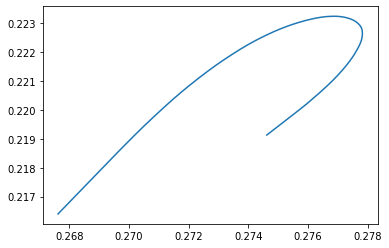

**Построим еще одну модель и сравним их между собой**

In [43]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [44]:
model2 = LogisticRegression()

In [45]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [46]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predictions2 = model2.predict_proba( X_test_short )

In [48]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

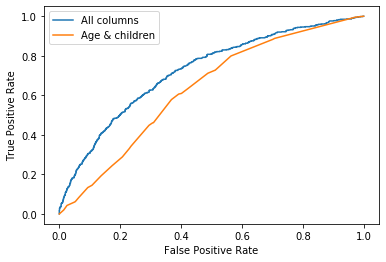

In [49]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [50]:
from sklearn.metrics import roc_curve

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5141550167462996

In [53]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [54]:
from sklearn.metrics import auc

In [55]:
auc( fpr, tpr )

0.7225943566902437

In [56]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [57]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [58]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [59]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [60]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

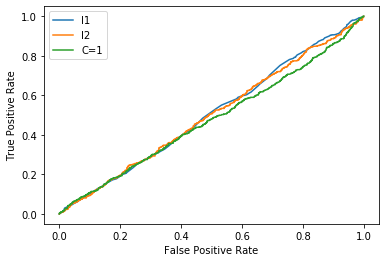

In [61]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [62]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [63]:
Y = data['affair']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [65]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [66]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [67]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

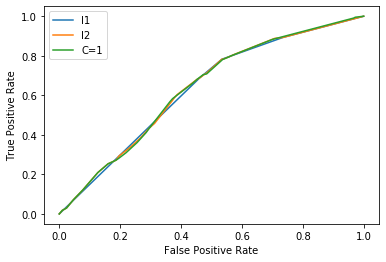

In [68]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()